In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from skimage.metrics import mean_squared_error
drive.mount('/content/drive')

Mounted at /content/drive


# **Cell 1: Piecewise Linear --> Slides[25-30]**

range(0, 256)


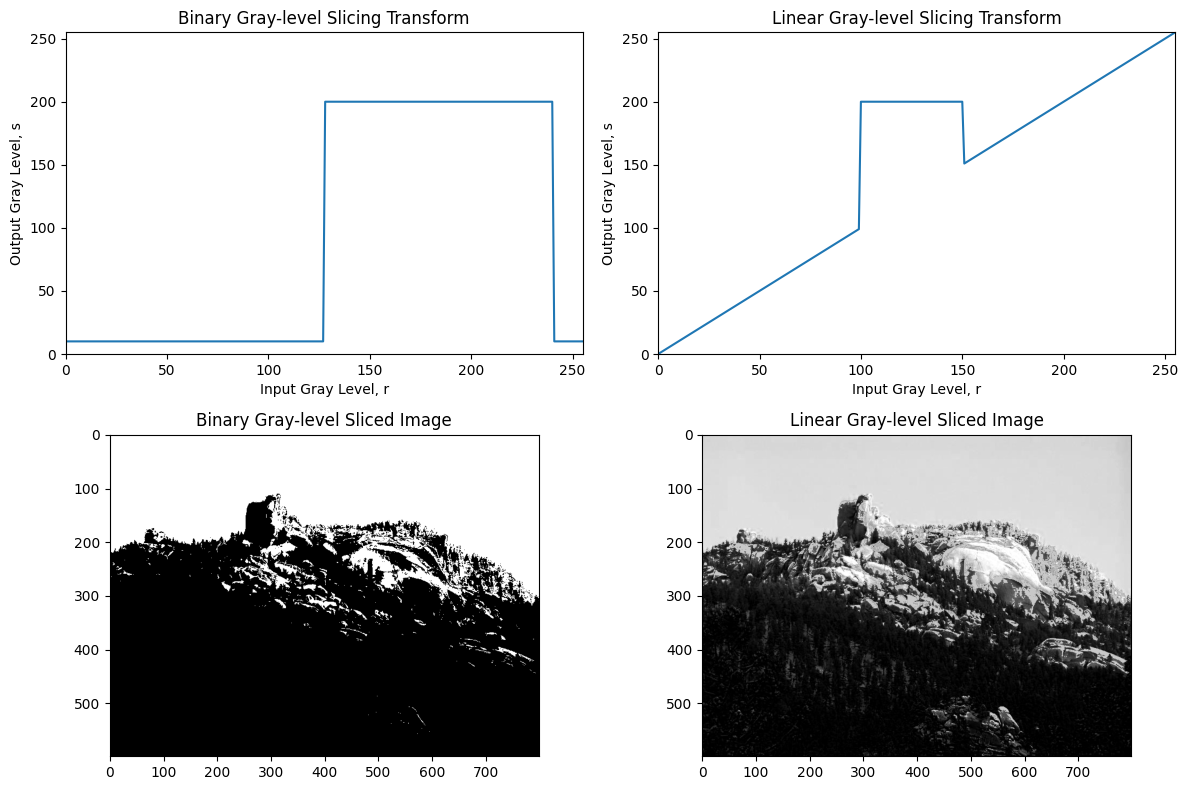

In [ ]:
# Read image
main_img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/HE1.jpg", cv2.IMREAD_GRAYSCALE)

# Create copies for binary and linear scaling
img1 = main_img.copy()
img2 = main_img.copy()

# Define thresholds
binary_low = 128
binary_high = 240
linear_low = 100
linear_high = 150

# Binary slicing
img1[main_img < binary_low] = 10
img1[main_img > binary_high] = 10
img1[(main_img >= binary_low) & (main_img <= binary_high)] = 200

# Linear slicing
img2[main_img < linear_low] = main_img[main_img < linear_low]
img2[main_img > linear_high] = main_img[main_img > linear_high]
img2[(main_img >= linear_low) & (main_img <= linear_high)] = 200

# Plot transformation functions (x and y not required for functionality)
x = range(256)
print(x)
y1 = [10] * 256
y1[binary_low:binary_high + 1] = [200] * (binary_high - binary_low + 1)
y2 = list(x)
y2[linear_low:linear_high + 1] = [200] * (linear_high - linear_low + 1)


plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(x, y1)
plt.title('Binary Gray-level Slicing Transform')
plt.axis([0, 255, 0, 255])
plt.xlabel('Input Gray Level, r')
plt.ylabel('Output Gray Level, s')

plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title('Linear Gray-level Slicing Transform')
plt.axis([0, 255, 0, 255])
plt.xlabel('Input Gray Level, r')
plt.ylabel('Output Gray Level, s')

plt.subplot(2, 2, 3)
plt.imshow(img1, cmap="gray")
plt.title('Binary Gray-level Sliced Image')

plt.subplot(2, 2, 4)
plt.imshow(img2, cmap="gray")
plt.title('Linear Gray-level Sliced Image')

plt.tight_layout()
plt.show()


# **Cell 2: Bit Planes --> Slides[32,33]**

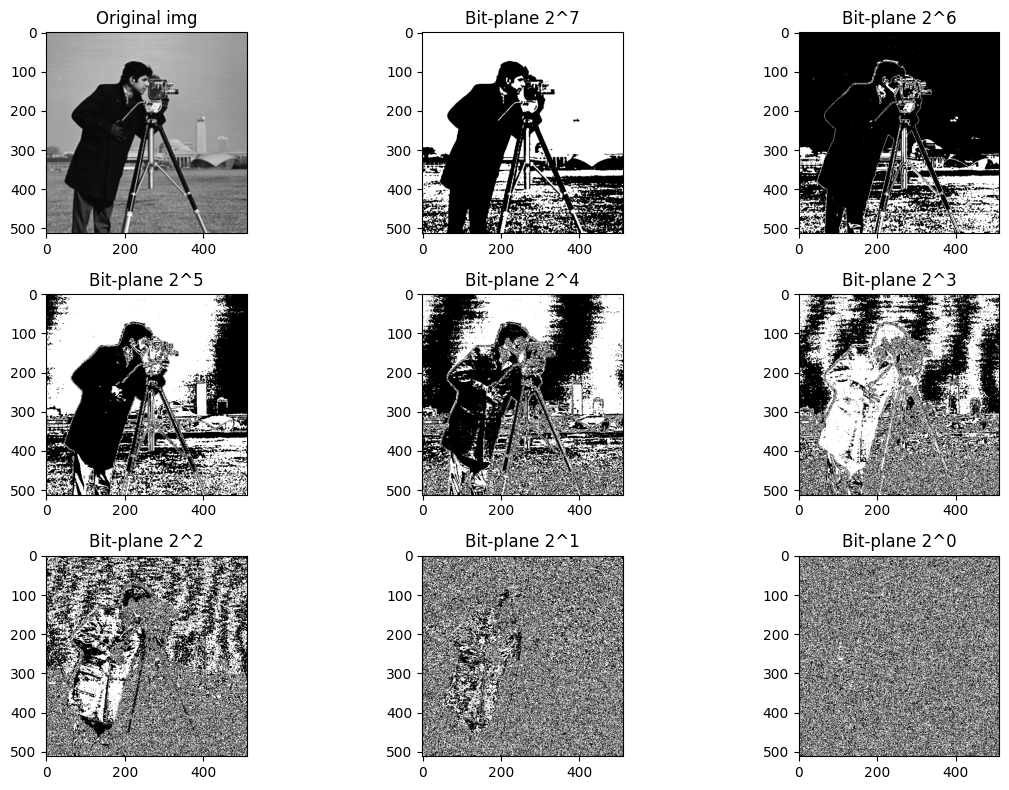

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Camera_man.bmp", cv2.IMREAD_GRAYSCALE)

# Create copies for each bit plane using a loop
bit_planes = []
for _ in range(8):
    bit_planes.append(img.copy())

# Extract bit planes using bitwise AND
bit_masks = [128, 64, 32, 16, 8, 4, 2, 1]

for i, mask in enumerate(bit_masks):
    # Convert mask to a NumPy array with the same shape as the image --> [Chapter 2 - slide 109]
    mask_int = np.full(img.shape, mask).astype(np.uint8)
    # Extract bit plane using bitwise AND
    bit_planes[i] = cv2.bitwise_and(img, mask_int).astype(np.uint8)

# Extract specific bit plane combinations
img76 = cv2.bitwise_and(img, 0b11000000).astype(np.uint8)
img765 = cv2.bitwise_and(img, 0b11100000).astype(np.uint8)
img7654 = cv2.bitwise_and(img, 0b11110000).astype(np.uint8)

plt.figure(figsize=(12, 8))
# Plot bit planes
for i in range(9):
  plt.subplot(3, 3, i+1)
  if i == 0:
    plt.title('Original img')
    plt.imshow(img, cmap="gray")
  else:
    plt.title(f'Bit-plane 2^{8-i}')
    plt.imshow(bit_planes[i-1], cmap="gray")

plt.tight_layout()
plt.show()


# **Cell 3: Bit Planes --> Slide[34]**

MSE = 81.44258117675781


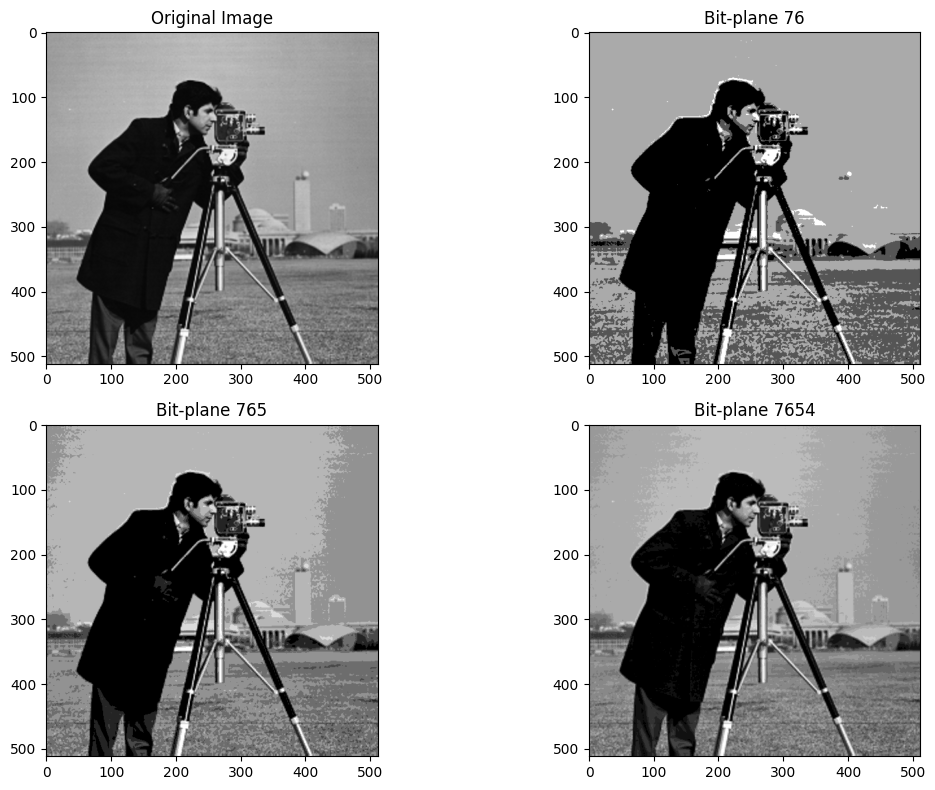

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(img76, cmap="gray")
plt.title('Bit-plane 76')

plt.subplot(2, 2, 3)
plt.imshow(img765, cmap="gray")
plt.title('Bit-plane 765')

plt.subplot(2, 2, 4)
plt.imshow(img7654, cmap="gray")
plt.title('Bit-plane 7654')

# Calculate Mean Squared Error
mse = mean_squared_error(img, img7654)
print("MSE =", mse)

plt.tight_layout()
plt.show()

# **Cell 4: Point Processes --> Slides[50-55]**

[189 184 173 169 165]


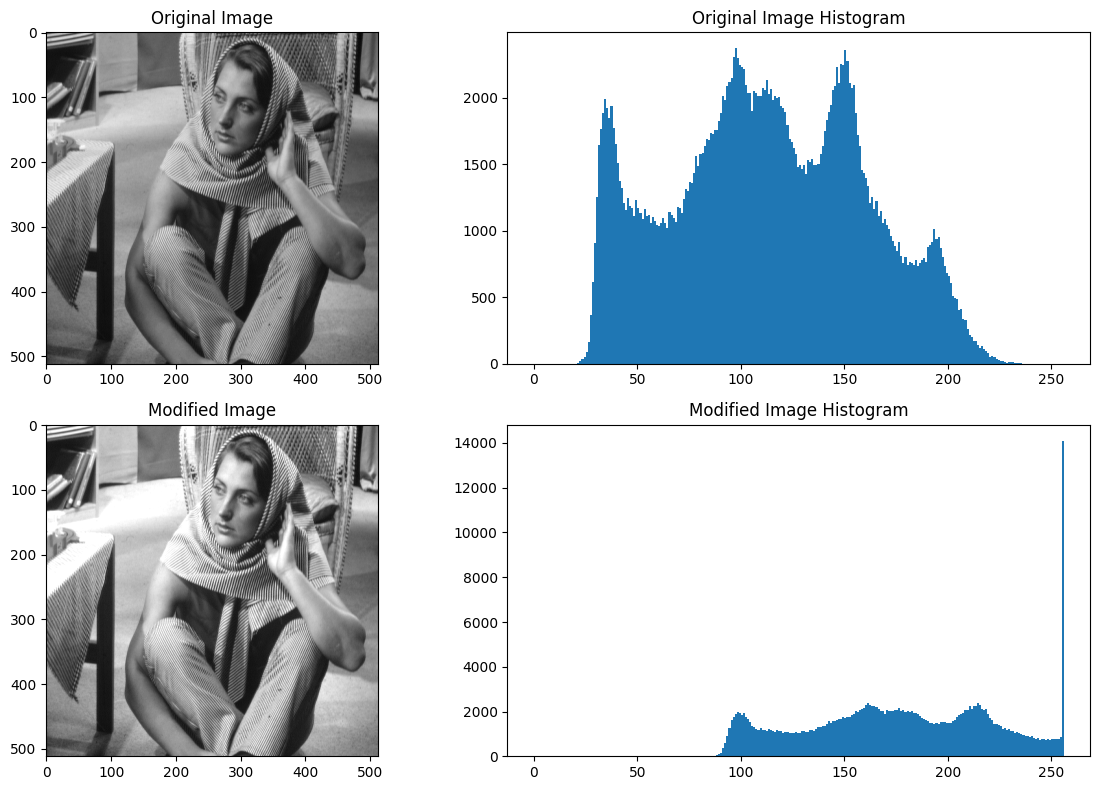

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Barbara.bmp", cv2.IMREAD_GRAYSCALE)
modified_image = img.copy()  # Create a copy for modification
ones = np.ones(img.shape)

# Operations to perform
operations = ["lighten"]

# Process the image pixel-wise
for op in operations:
  if op == "invert":
    modified_image = 255 - modified_image
  elif op == "darken":
    modified_image = modified_image - (ones * 64)
  elif op == "lighten":
    modified_image = modified_image + (ones * 64)
  elif op == "rcontrast":
    modified_image = modified_image * (ones * 2)
  elif op == "lcontrast":
    modified_image = modified_image // (ones * 2)

modified_image = np.clip(modified_image, 0, 255).astype(np.uint8)
print(modified_image[0][:5])

# Plot original and modified images with histograms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.title('Original Image Histogram')

plt.subplot(2, 2, 3)
plt.imshow(modified_image, cmap="gray", vmin = 0, vmax = 255)
plt.title('Modified Image')

plt.subplot(2, 2, 4)
plt.hist(modified_image.ravel(), bins=256, range=(0, 256))
plt.title('Modified Image Histogram')

plt.tight_layout()
plt.show()


# **Cell 5: Gamma Point Process --> Slides[57,58]**

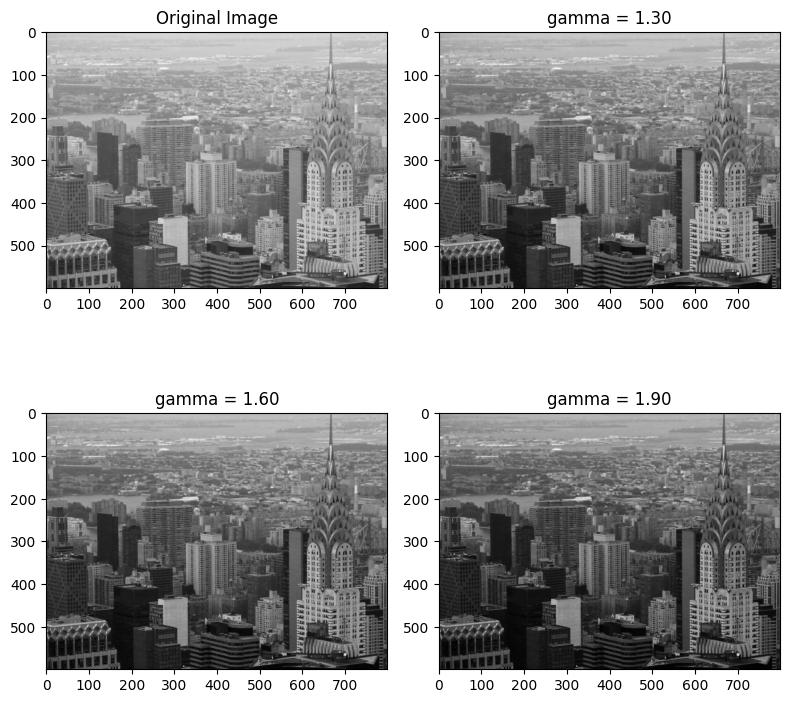

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/HE4.jpg") # HE4

# Gamma values
# gammas = [0.9, 0.6, 0.3]
gammas = [1.3, 1.6, 1.9]

# Plot original image
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img[:, :, ::-1])  # OpenCV uses BGR, convert to RGB for display
plt.title('Original Image')

# Apply gamma correction and normalization for each gamma value
for n, gamma in enumerate(gammas):
    # Convert image to float for calculations (avoid overflow)
    g_corrected = img.astype(np.float32)
    # Apply gamma correction
    g_corrected = g_corrected ** gamma

    # Normalization (prevents overflow during display) --> slide[23]
    g_norm = ((g_corrected - g_corrected.min()) / (g_corrected.max() - g_corrected.min()))* 255

    # Convert back to uint8 for image display
    g_norm = np.clip(g_norm, 0, 255).astype(np.uint8)

    # Plot gamma-corrected image
    plt.subplot(2, 2, n + 2)
    plt.imshow(g_norm[:, :, ::-1])  # Convert back to BGR for display
    plt.title(f"gamma = {gamma:.2f}")  # Format title with 2 decimal places

plt.tight_layout()
plt.show()


# **Cell 6: Gaussian Filter --> Slides[207-214]**

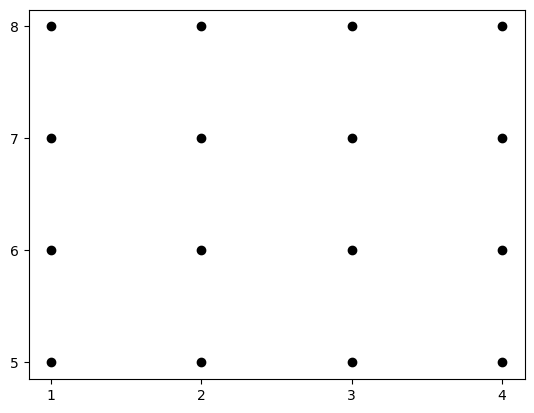

In [ ]:
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]

xx, yy = np.meshgrid(x, y)
plt.plot(xx, yy, marker = 'o', color= 'k', linestyle = 'none')
plt.xticks(x)
plt.yticks(y)

plt.show()


[[-10.76107    -14.0989       3.3812966   -7.28877      1.7980018 ]
 [ -6.285511     8.860492    11.5883       5.6700153   -0.82652867]]


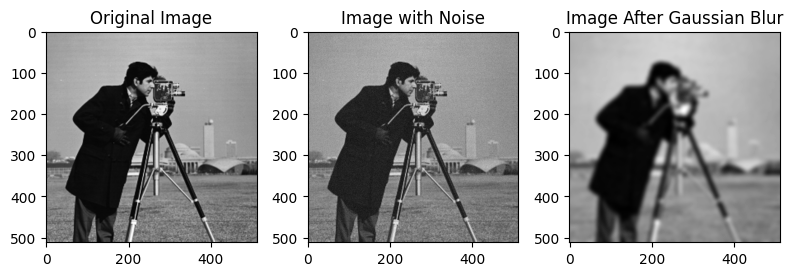

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Camera_man.bmp", cv2.IMREAD_GRAYSCALE)

# Define noise parameters
mean = 0
var = 100  # Adjust variance for desired noise level

# Generate Gaussian noise with the same shape as the image
noise = np.random.normal(mean, np.sqrt(var), size=img.shape).astype(np.float32)
print(noise[:2,:5])

# Add noise to the image
noisy_img = img.astype(np.float32) + noise

# Convert image to float for calculations
# I = noisy_img.astype(np.float32)

# Define Gaussian kernel parameters
sigma = 5
sz = 10

# Create meshgrid for kernel calculation
x, y = np.meshgrid(np.arange(-sz, sz + 1), np.arange(-sz, sz + 1))

# Calculate Gaussian filter components
exponent_component = -(x**2 + y**2) / (2 * sigma**2)
kernel = np.exp(exponent_component) / (2 * np.pi * sigma**2)

# Apply Gaussian blur using convolution (same padding)
output = cv2.filter2D(I, -1, kernel, borderType=cv2.BORDER_REPLICATE)

# Convert back to uint8 for image display
output = np.clip(output, 0, 255).astype(np.uint8)

# Plot noisy and blurred images
plt.figure(figsize=(8, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(noisy_img, cmap="gray")
plt.title("Image with Noise")
plt.subplot(1, 3, 3)
plt.imshow(output, cmap="gray")
plt.title("Image After Gaussian Blur")
plt.tight_layout()
plt.show()


# **Cell 7: Comparison of Median Filter and Box Filter --> Slides[217,218]**

7441
2232
1488


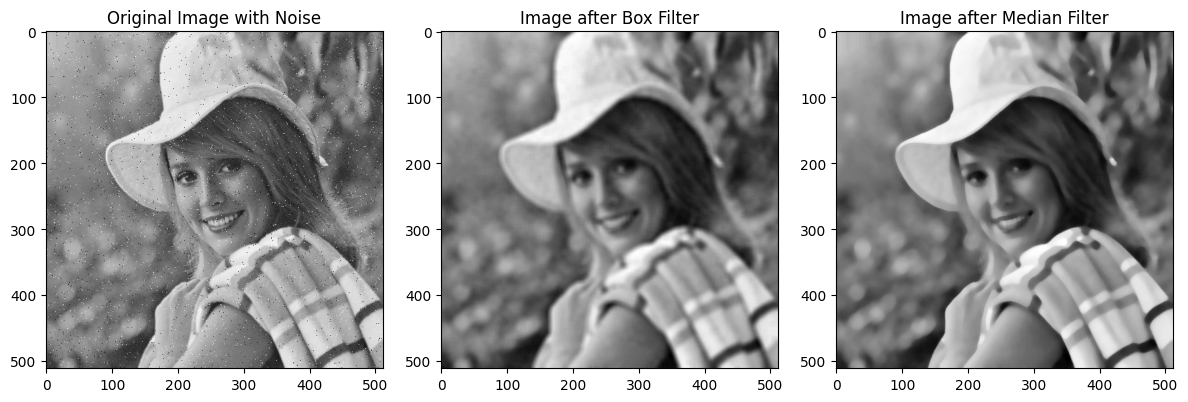

In [15]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Elaine.bmp", cv2.IMREAD_GRAYSCALE)

# Define salt-and-pepper noise probability
noise_prob = 0.2
salt_prob = 0.3
pepper_prob = 0.2

# Create a copy for noise addition
img_noisy = img.copy()

# Randomly select pixels for noise (salt or pepper)
num_pixels = np.random.randint(0, img.size * noise_prob)
salt_pepper_pixels = np.random.randint(0, img.size, size=num_pixels)
print(len(salt_pepper_pixels))

salt_pixels = np.random.choice(salt_pepper_pixels, size=int(num_pixels * salt_prob))
print(len(salt_pixels))

# Apply salt noise (set to white)
img_noisy.flat[salt_pixels] = 255

# Apply pepper noise (set to black) with probability adjustment
pepper_pixels = np.random.choice(salt_pepper_pixels[~np.isin(salt_pepper_pixels, salt_pixels)],
                                 size=int(num_pixels * pepper_prob))
print(len(pepper_pixels))

# Apply pepper noise (set to black)
img_noisy.flat[pepper_pixels] = 0


# Convert image to float for calculations
img2_float = img_noisy.astype(np.float32) / 255.0  # Normalize to [0, 1]

sz = 9  # Change sz to an odd number (e.g., 3, 5, 7, 9)

# Create box filter (ones matrix divided by area)
box_filter = np.ones((sz, sz), dtype=np.float32) / (sz * sz)

# Apply box filter using convolution (same padding)
img2_filtered = cv2.filter2D(img2_float, -1, box_filter, borderType=cv2.BORDER_REPLICATE)

# Apply median filter
img3_filtered = cv2.medianBlur(img_noisy.astype(np.uint8), sz)

# Plot original, smoothed, and median-filtered images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_noisy, cmap="gray")
plt.title('Original Image with Noise')
plt.subplot(1, 3, 2)
plt.imshow(img2_filtered, cmap="gray")
plt.title('Image after Box Filter')
plt.subplot(1, 3, 3)
plt.imshow(img3_filtered, cmap="gray")
plt.title('Image after Median Filter')
plt.tight_layout()
plt.show()


# **Cell 8: Application of Box Filter**

0.91907626


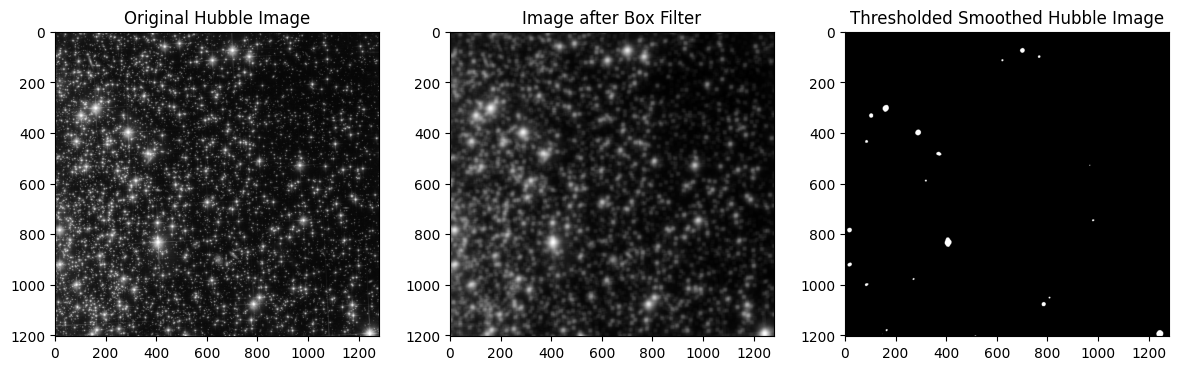

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/Hubble.jpg")

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Define filter size
sz = 15

# Create box filter (ones matrix divided by area)
h = np.ones((sz, sz), dtype=np.float32) / (sz * sz)

# Apply box filter using convolution (same padding)
img_filtered = cv2.filter2D(img_gray, -1, h, borderType=cv2.BORDER_REPLICATE)

# Calculate threshold
threshold = 0.75 * np.max(img_filtered)

# Create binary image (thresholding)
img_thresh = img_filtered.copy()
img_thresh[img_thresh >= threshold] = 1
img_thresh[img_thresh < threshold] = 0

# Plot original, filtered, and thresholded images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title('Original Hubble Image')
plt.subplot(1, 3, 2)
plt.imshow(img_filtered, cmap="gray")
plt.title('Image after Box Filter')
plt.subplot(1, 3, 3)
plt.imshow(img_thresh, cmap="gray")
plt.title('Thresholded Smoothed Hubble Image')
plt.tight_layout()
plt.show()


# **Cell 9: Laplacian Filter --> Slides[237-240]**

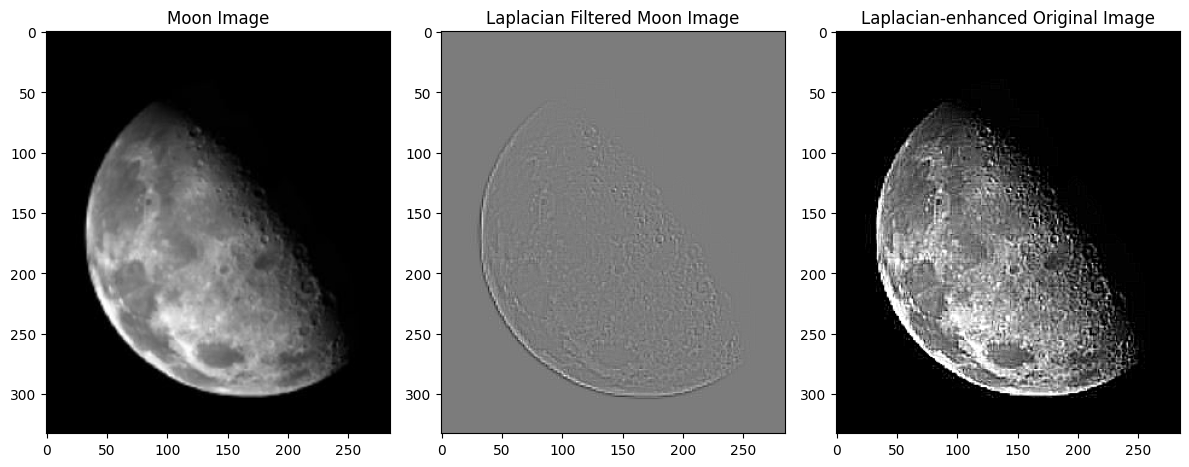

In [ ]:
# Read image
img = cv2.imread("/content/drive/MyDrive/Image_Processing_Photos/moon.jpg")

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0  # Normalize to [0, 1]

# Define Laplacian filter
laplacian = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32)

# Apply Laplacian filter using convolution (same padding)
img_laplacian = cv2.filter2D(img_gray, -1, laplacian, borderType=cv2.BORDER_REPLICATE)

# Add Laplacian-filtered image back to the original image (with saturation)
img_enhanced = np.clip(img_gray + img_laplacian, 0, 1)  # Avoid overflow

# Plot original, filtered, scaled Laplacian, and enhanced images
plt.figure(figsize=(12, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title('Moon Image')

plt.subplot(1, 3, 2)
plt.imshow(img_laplacian, cmap="gray")
plt.title('Laplacian Filtered Moon Image')
plt.subplot(1, 3, 3)

plt.imshow(img_enhanced, cmap="gray")
plt.title('Laplacian-enhanced Original Image')
plt.tight_layout()
plt.show()


# **Cell 10: Bilateral Filter --> Slides[269-278]**

<ipython-input-2-8470d3ee7f3d>:43: RuntimeWarning: overflow encountered in scalar subtract
  color_weight = gaussian(center_intensity - neighbor_intensity, sigma_color)


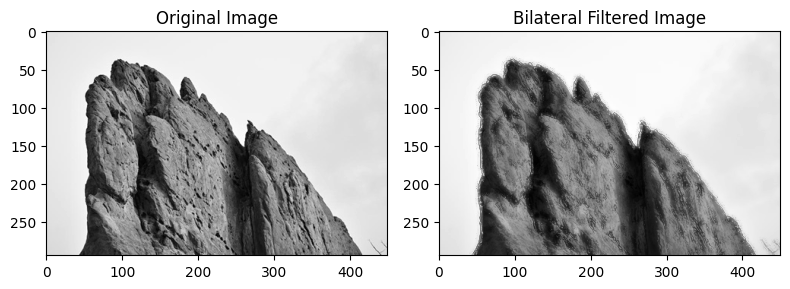

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Mountain.jpg', cv2.IMREAD_GRAYSCALE)
height, width = image.shape

# Parameters for the bilateral filter
diameter = 9  # Diameter of pixel neighborhood (similar to kernel size)
sigma_color = 75  # Intensity/color variance (range sigma)
sigma_space = 75  # Spatial variance (space sigma)
half_d = diameter // 2  # Half of the diameter

# Create output image
bilateral_filtered_image = np.zeros_like(image)

# Helper function: Gaussian function
def gaussian(x, sigma):
    return np.exp(-(x**2) / (2 * sigma**2))

# Apply bilateral filter
for i in range(height):
    for j in range(width):
        # Initialize weight sum and pixel sum
        wp_total = 0
        pixel_sum = 0

        # Get the current pixel value
        center_intensity = image[i, j]

        # Loop over the neighborhood
        for k in range(-half_d, half_d + 1):
            for l in range(-half_d, half_d + 1):
                # Calculate the neighbor's position
                ni = i + k
                nj = j + l

                # Check if neighbor is within image bounds
                if 0 <= ni < height and 0 <= nj < width:
                    neighbor_intensity = image[ni, nj]

                    # Compute Gaussian spatial weight
                    spatial_weight = gaussian(np.sqrt(k**2 + l**2), sigma_space)

                    # Compute Gaussian color weight
                    color_weight = gaussian(center_intensity - neighbor_intensity, sigma_color)

                    # Combine the two Gaussian weights
                    weight = spatial_weight * color_weight

                    # Accumulate weighted intensity and weight sum
                    pixel_sum += weight * neighbor_intensity
                    wp_total += weight

        # Set the output pixel value as the normalized sum
        bilateral_filtered_image[i, j] = pixel_sum / wp_total

# Plot noisy and blurred images
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_image, cmap="gray")
plt.title("Bilateral Filtered Image")
plt.tight_layout()
plt.show()


# **Cell 11: Bilateral Filter --> Slides[269-278]**

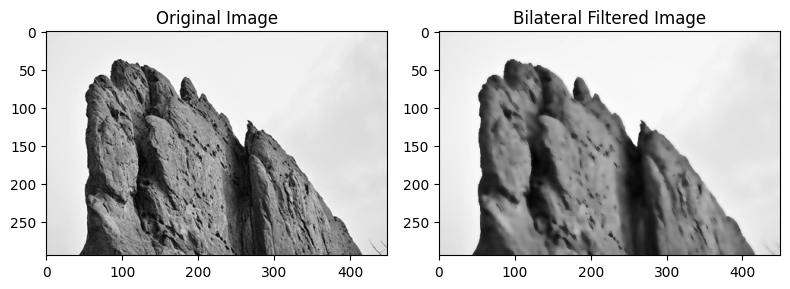

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/Image_Processing_Photos/Mountain.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for the bilateral filter
d = 9  # Diameter of each pixel neighborhood.
sigma_color = 75  # Filter sigma in the color space.
sigma_space = 75  # Filter sigma in the coordinate space.

# Apply the bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)

# Plot noisy and blurred images
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_image, cmap="gray")
plt.title("Bilateral Filtered Image")
plt.tight_layout()
plt.show()
